<a href="https://colab.research.google.com/github/angel-lar/Metodos-numericos/blob/main/chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{Nodos de Chevyshev}$

$\text{para evitar el problema de Runge, vamos a utilizar la formula vista en la clase pasada que consiste en tomar puntos igualmente espaciados respecto a la longitud de arco de un coseno y proyectar esos puntos en el eje c}$

$\text{Importamos las librerias}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

$\text{colocamos la función de rungue}$

In [4]:
def runge(x):
    return 1 / (1 + 25 * x**2)

$\text{ahora usamos las formulas de la clase pasada para calcular los nodos}$

In [5]:
def chebyshev(n, a, b):
    k = np.arange(1, n + 1)
    x_cheb = np.cos((2*k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb

$\text{aquí copiaré y pegaré mi función del polinomio interpolador de lagrange qué hice en este curso}$

In [6]:
def lagrange(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    polinomio = 0

    for i in range(n):
        xi, yi = puntos[i]
        termino = yi
        for j in range(n):
            if i != j:
                xj, _ = puntos[j]
                termino *= (x - xj) / (xi - xj)
        polinomio += termino

    return sp.expand(polinomio)

$\text{definimos la función que hará la interpolación}$

In [8]:
def interpolar(n):
    a, b = -1, 1
    x_nodes = chebyshev(n, a, b)
    y_nodes = runge(x_nodes)

    puntos = list(zip(x_nodes, y_nodes))
    P = lagrange(puntos)

    # creamos función numérica desde el polinomio simbólico
    x = sp.Symbol('x')
    P_func = sp.lambdify(x, P, modules=['numpy'])

    # evaluamos y gráficamos
    x_vals = np.linspace(a, b, 1000)
    y_true = runge(x_vals)
    y_interp = P_func(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_true, label='Función de Runge', linewidth=2)
    plt.plot(x_vals, y_interp, label=f'Interpolación Lagrange con {n} nodos Chebyshev', linestyle='--')
    plt.plot(x_nodes, y_nodes, 'ro', label='Nodos de Chebyshev')
    plt.title('Interpolación de la función de Runge')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
'''
    #imprimo el simbolico como prueba
    print("\nPolinomio interpolante de Lagrange:")
    sp.pprint(P, use_unicode=True)
'''

'\n    #imprimo el simbolico como prueba\n    print("\nPolinomio interpolante de Lagrange:")\n    sp.pprint(P, use_unicode=True)\n'

$\text{Evaluemos el polinimio con 5, 9, 11, 21 nodos}$

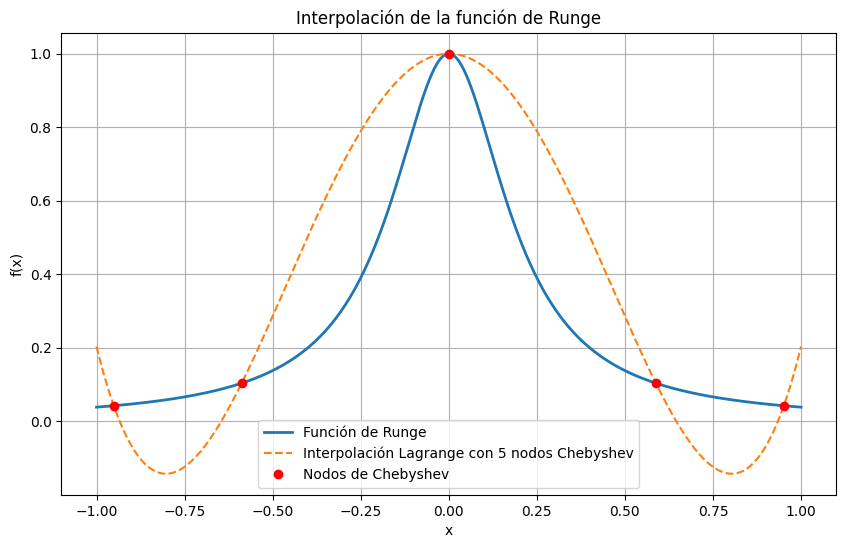

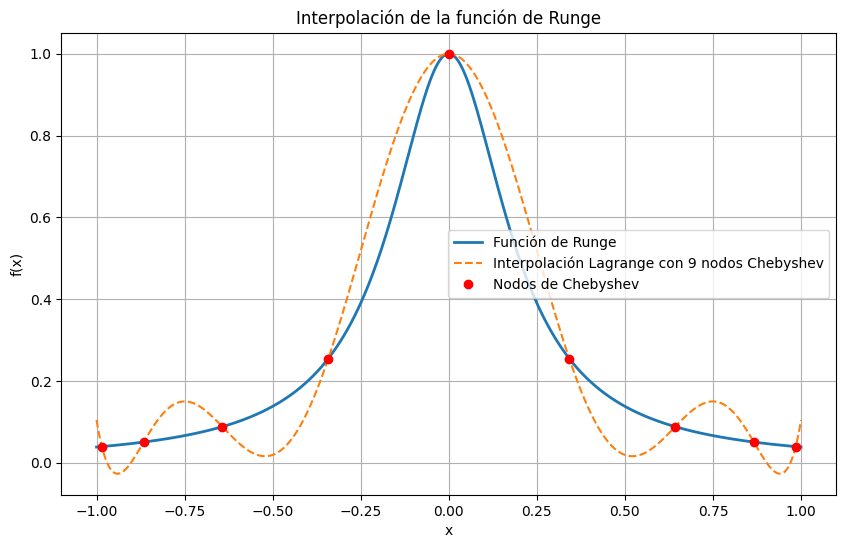

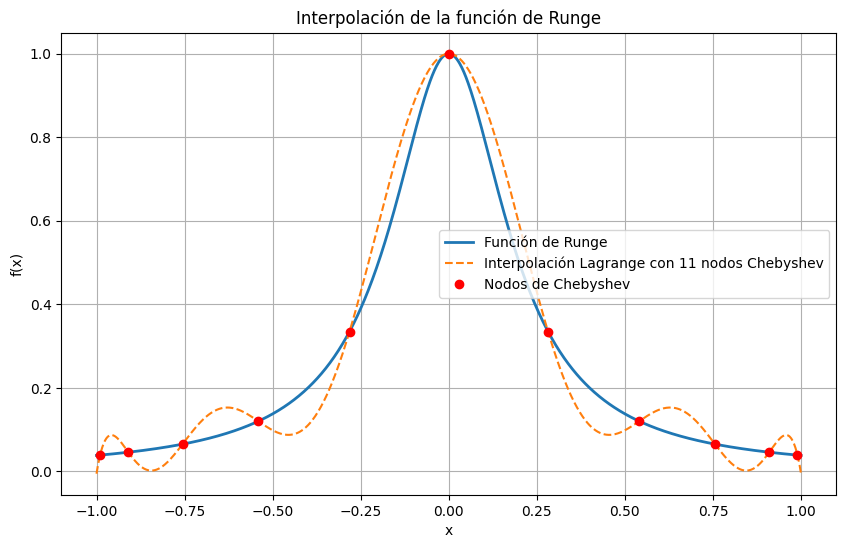

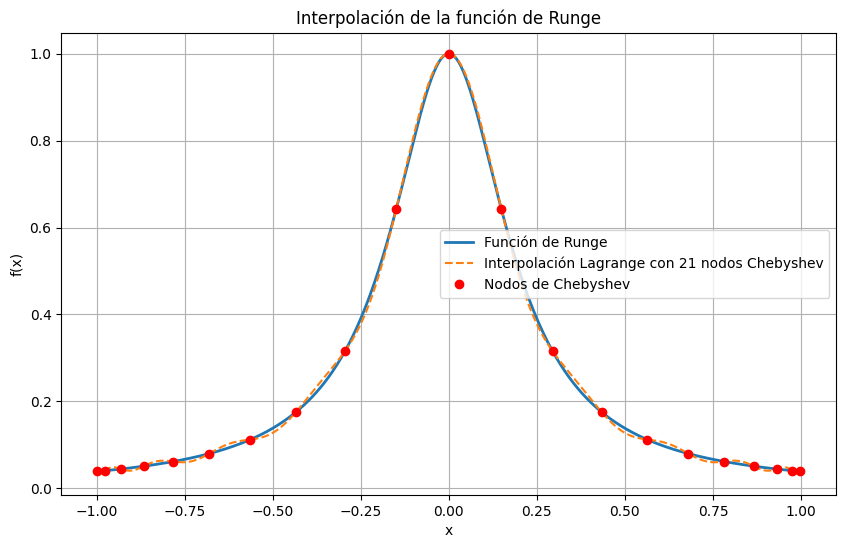

In [9]:
interpolar(5)
interpolar(9)
interpolar(11)
interpolar(21)


$\text{donde podemos observar claramente cómo los nodos de chebyshev funcionan, más aún, mientras más haya, mejor es la aproximación}$